# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [2]:
# Load the provided .csv file with the used car data

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

# place your loading code here
next(lines) # skip first line 

data = np.array([[el for el in line] for line in lines],dtype=float) 
km = data[:,0]
year = data[:,1]
power = data[:,2]
price = data[:,3]


Use a linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [3]:
# linear regression with linregress (estimate price from year)

m1, q1, corr1, _, _ = stats.linregress(year,price)
print(m1, q1, corr1)


1509.0938253352194 -3018309.4849569546 0.6767043169095437


In [6]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)

lm1 = linear_model.LinearRegression().fit(year.reshape(-1,1),price)
# lm2 = linear_model.LinearRegression().fit(year.reshape(-1,1),price)
# lm3 = linear_model.LinearRegression().fit(power.reshape(-1,1),price)

print(lm1.coef_[0], lm1.intercept_, np.sqrt(lm1.score(year.reshape(-1,1),price)))

1509.09382533522 -3018309.4849569555 0.6767043169095444


In [22]:
# linear regression with least squares (estimate price from year)
# You should get exactly the same solution of linregress !

year_hom = np.array([np.ones(len(year)), year])
A=year_hom@year_hom.T
b=year_hom@price.reshape(-1,1)
w=np.linalg.inv(A)@b
print(w[1,0],w[0,0])

1509.0938252720516 -3018309.4848303795


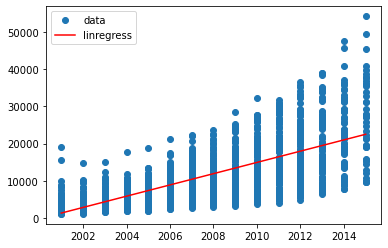

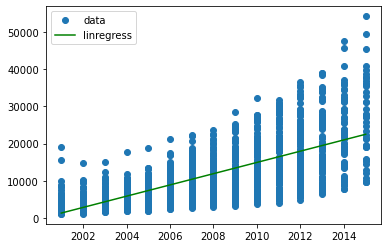

In [24]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

plt.plot(year,price,'o', label='data')
plt.plot(year,m1*year+q1, 'r', label='linregress')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(year,price,'o', label='data')
plt.plot(year,w[1,0]*year+w[0,0], 'g', label='linregress')
plt.legend()
plt.show()

In [25]:
# linear regression with linregress (estimate price from power)

m2, q2, corr2, _, _ = stats.linregress(power,price)
print(m2, q2, corr2)


90.33080718820231 -1303.912698987995 0.7085500315263968


In [26]:
# linear regression with linregress (estimate price from km)

m3, q3, corr3, _, _ = stats.linregress(km,price)
print(m3, q3, corr3)


-0.054251513309725635 16692.345302519738 -0.25728674299884974


In [27]:
# Have a look at the correlation coefficients to see which of the 3 features works better

print(corr1,corr2,corr3)


0.6767043169095437 0.7085500315263968 -0.25728674299884974


[1325.2284004    80.43004469] -2661196.786749007


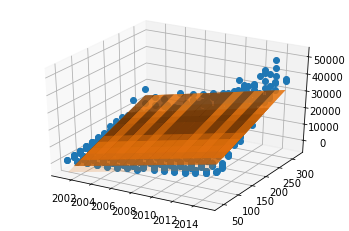

In [51]:
# Optional : 2D linear regression with linear model (estimate price from year and power)

x = np.array([year,power])
lm2d = linear_model.LinearRegression().fit(x.T,price)
print(lm2d.coef_, lm2d.intercept_)
x1,x2=np.meshgrid(year,power)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(year,power,price, 'o')
ax.plot_surface(x1,x2,lm2d.coef_[0]*x1+lm2d.coef_[1]*x2+lm2d.intercept_,alpha=0.2)